# Fashion MNIST

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST.

The classes are:

0:	T-shirt/top
1:	Trouser
2:	Pullover
3:	Dress
4:	Coat
5:	Sandal
6:	Shirt
7:	Sneaker
8:	Bag
9:	Ankle boot

In [ ]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


## TODO 1: 훈련 데이터 살펴보기

1. 훈련 데이터의 처음 세 장을 그려보세요.

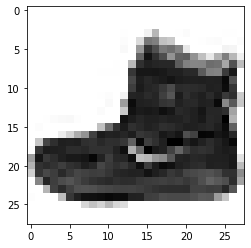

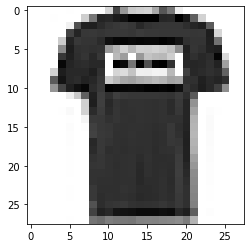

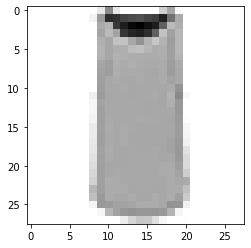

In [ ]:
import matplotlib.pyplot as plt

for i in range(3): 
  digit = train_images[i]

  plt.imshow(digit, cmap=plt.cm.binary)
  plt.show()

## TODO 2: 데이터 전처리 (모양 바꾸기, 정규화, 레이블 변환)
레이블 변환은 하지 않고 TODO3의 loss에 'categorical_crossentropy' 대신 'sparse_categorical_crossentropy'를 사용해도 됩니다.

In [ ]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,))) 
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

norm_train_images = train_images.reshape((60000, 28 * 28))
norm_train_images = norm_train_images.astype('float32') / 255

norm_test_images = test_images.reshape((10000, 28 * 28))
norm_test_images = norm_test_images.astype('float32') / 255

from tensorflow.keras.utils import to_categorical
'''
cat_train_labels = to_categorical(train_labels)
cat_test_labels = to_categorical(test_labels)
'''
network.fit(norm_train_images, train_labels, epochs=5, batch_size=128)

test_loss, test_acc = network.evaluate(norm_test_images, test_labels)

print('test_acc:', test_acc)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.5522 - accuracy: 0.8056
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3796 - accuracy: 0.8607
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3356 - accuracy: 0.8769
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3109 - accuracy: 0.8854
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3346 - accuracy: 0.8808
test_acc: 0.8808000087738037


## TODO 3: 모델 훈련 (모델 생성, compile, fit, evaluate)
테스트 데이터에 대해 88% 이상의 정확도를 보이는 모델을 만들어 보세요.

In [ ]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,))) 
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

norm_train_images = train_images.reshape((60000, 28 * 28))
norm_train_images = norm_train_images.astype('float32') / 255

norm_test_images = test_images.reshape((10000, 28 * 28))
norm_test_images = norm_test_images.astype('float32') / 255

from tensorflow.keras.utils import to_categorical
'''
cat_train_labels = to_categorical(train_labels)
cat_test_labels = to_categorical(test_labels)
'''
network.fit(norm_train_images, train_labels, epochs=5, batch_size=128)

test_loss, test_acc = network.evaluate(norm_test_images, test_labels)

print('test_acc:', test_acc)

## TODO 4: 틀린 예제 확인하기
TODO 3에서 만든 모델이 잘못 분류하는 그림을 테스트 데이터에서 하나 이상 찾아 그려보세요. <br>
(원래 레이블과 모델이 예측한 레이블도 주석 등으로 표시)

7


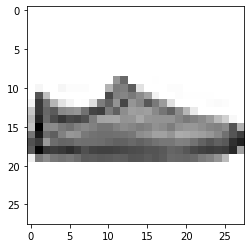

[[2.0351476e-06 1.7865526e-08 4.2850894e-07 1.2928466e-06 1.8734315e-07
  9.6639061e-01 1.2484393e-06 1.6778566e-02 1.6809165e-02 1.6465176e-05]]
5


In [ ]:
import numpy as np

a = test_labels[12]
print(a)
digit = test_images[12]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

print((network.predict(np.array([norm_test_images[12],]))))
b = np.argmax(network.predict(np.array([norm_test_images[num],])))
print(b)

In [ ]:
import numpy as np
# 사진의 정답
for i in range(100):
  num = i
  a = test_labels[num]
  # print("label의 정답")
  # print(a)

  # 12번째 사진 그림
  # digit = test_images[12]
  # plt.imshow(digit, cmap=plt.cm.binary)
  # plt.show()

  # 네트워크가 예측한 결과
  #

  # print((network.predict(np.array([norm_test_images[num],]))))
  b = np.argmax(network.predict(np.array([norm_test_images[num],])))
  # print("예측모델의 정답")
  # print(b)

  if(a!=b):
    print("잘못 분류한 그림")
    print(num)
    break


잘못 분류한 그림
12
